<style>
@page {
    margin: 1in;
    @top-left {
        content: "EICDT24404";
        font-weight: bold;
    }
    @top-right {
        content: "Deep Learning";
        font-weight: bold;
    }
    @bottom-left {
        content: "Lab-2";
    }
    @bottom-right {
        content: "Enrollment Number: 230090";
    }
}

body {
    font-family: "Georgia", "Times New Roman", serif;
    font-size: 14pt;
}
</style>

# Lab-2 : Implement a single-neuron classifier from scratch and explore how activation functions affect learning and decision boundaries.
---

In [11]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Set random seed for reproducibility
np.random.seed(42)

---
# Part A: Perceptron with Step Activation

### Step 1: Generate Synthetic Dataset (Linearly Separable)

In [ ]:
def generate_linear_dataset(n_samples=100):
    class_0 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
    
    class_1 = np.random.randn(n_samples // 2, 2) + np.array([5, 5])
    
    X = np.vstack([class_0, class_1])
    y = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])
    
    return X, y

X_linear, y_linear = generate_linear_dataset(100)
print(f"Dataset shape: {X_linear.shape}")
print(f"Labels shape: {y_linear.shape}")

Dataset shape: (100, 2)
Labels shape: (100,)


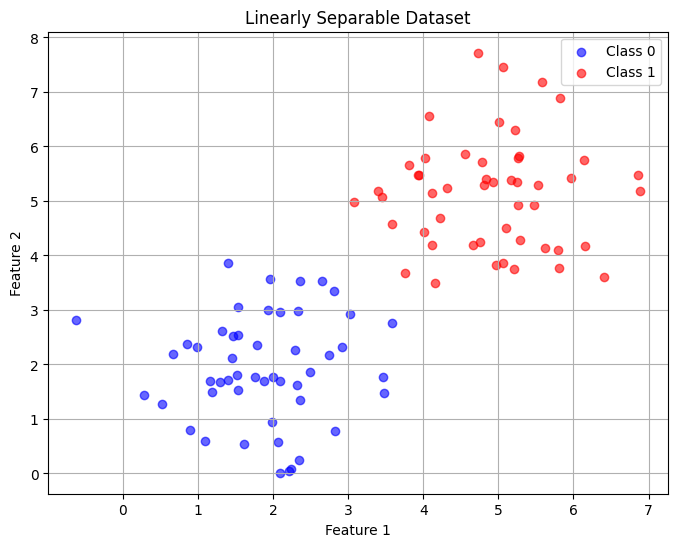

In [14]:
# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_linear[y_linear == 0][:, 0], X_linear[y_linear == 0][:, 1], 
            c='blue', label='Class 0', alpha=0.6)
plt.scatter(X_linear[y_linear == 1][:, 0], X_linear[y_linear == 1][:, 1], 
            c='red', label='Class 1', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.legend()
plt.grid(True)
plt.show()

### Step 2: Implement Perceptron Components

In [ ]:
def step_activation(x):
    return np.where(x >= 0, 1, 0)

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return step_activation(z)
    
    def train(self, X, y, epochs=100):
        for epoch in range(epochs):
            predictions = self.predict(X)
            
            for i in range(len(X)):
                error = y[i] - predictions[i]
                # Update rule: w = w + learning_rate * error * x
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
        
        return self

perceptron = Perceptron(input_size=2, learning_rate=0.1)
perceptron.train(X_linear, y_linear, epochs=100)

print(f"Trained Weights: {perceptron.weights}")
print(f"Trained Bias: {perceptron.bias}")

Trained Weights: [6.17994405 5.48625718]
Trained Bias: -41.41694875682504


### Step 3: Plot Decision Boundary

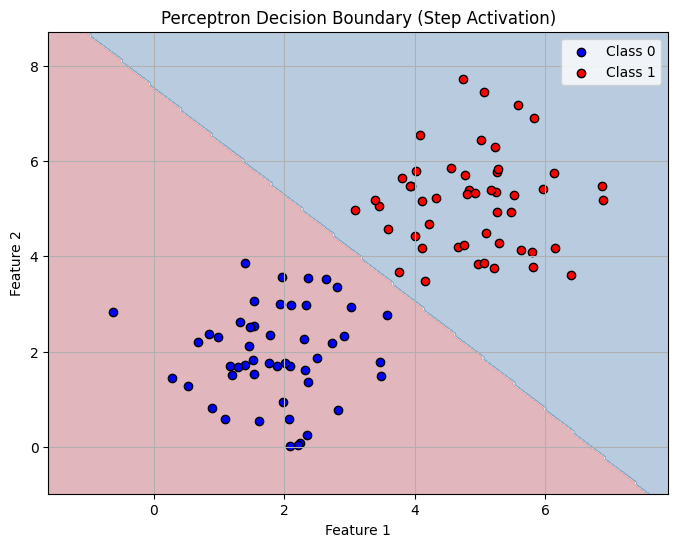

Perceptron Accuracy: 100.00%


In [ ]:
def plot_decision_boundary(model, X, y, title):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='blue', label='Class 0', edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='red', label='Class 1', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(perceptron, X_linear, y_linear, 
                      'Perceptron Decision Boundary (Step Activation)')

predictions = perceptron.predict(X_linear)
accuracy = np.mean(predictions == y_linear) * 100
print(f"Perceptron Accuracy: {accuracy:.2f}%")

---
# Part B: Neuron with Sigmoid Activation

### Step 1: Implement Sigmoid Activation and Loss Functions

In [17]:
def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-x))

def binary_cross_entropy(y_true, y_pred):
    """Binary cross entropy loss"""
    # Add small value to avoid log(0)
    epsilon = 1e-10
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class SigmoidNeuron:
    def __init__(self, input_size, learning_rate=0.1):
        # Initialize weights randomly (small values)
        self.weights = np.random.randn(input_size) * 0.1
        self.bias = np.random.randn() * 0.1
        self.learning_rate = learning_rate
        self.loss_history = []
    
    def predict(self, X):
        """Make predictions using sigmoid activation"""
        # Compute dot product + bias
        z = np.dot(X, self.weights) + self.bias
        # Apply sigmoid activation
        return sigmoid(z)
    
    def train(self, X, y, epochs=1000):
        """Train using gradient descent"""
        for epoch in range(epochs):
            # Forward pass
            z = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(z)
            
            # Calculate loss
            loss = binary_cross_entropy(y, predictions)
            self.loss_history.append(loss)
            
            # Calculate gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(X)
            db = np.mean(error)
            
            # Update weights
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
        return self

print("Sigmoid and loss functions defined successfully!")

Sigmoid and loss functions defined successfully!


### Step 2: Train Sigmoid Neuron

In [18]:
# Create and train sigmoid neuron
sigmoid_neuron = SigmoidNeuron(input_size=2, learning_rate=0.1)
sigmoid_neuron.train(X_linear, y_linear, epochs=1000)

print(f"Trained Weights: {sigmoid_neuron.weights}")
print(f"Trained Bias: {sigmoid_neuron.bias}")
print(f"Final Loss: {sigmoid_neuron.loss_history[-1]:.4f}")

Trained Weights: [0.97470304 0.83453544]
Trained Bias: -5.9168790848740915
Final Loss: 0.1055


### Step 3: Plot Loss Curve

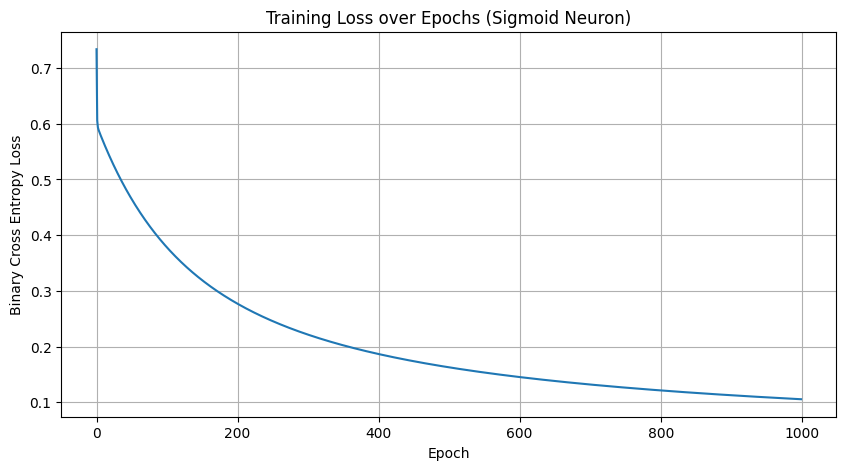

In [19]:
# Plot loss vs epochs
plt.figure(figsize=(10, 5))
plt.plot(sigmoid_neuron.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Training Loss over Epochs (Sigmoid Neuron)')
plt.grid(True)
plt.show()

### Step 4: Plot Decision Boundary and Calculate Accuracy

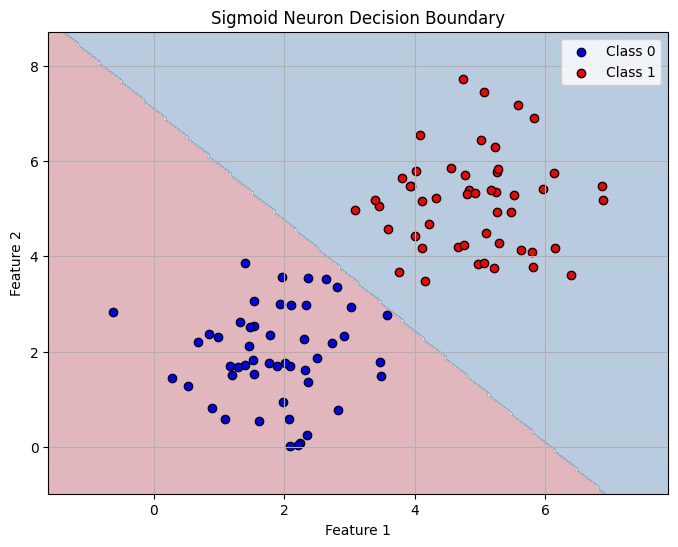

Sigmoid Neuron Accuracy: 100.00%


In [20]:
# Update predict method to return binary output for plotting
class SigmoidNeuronWithBinary(SigmoidNeuron):
    def predict(self, X):
        """Make predictions and convert to binary"""
        z = np.dot(X, self.weights) + self.bias
        probs = sigmoid(z)
        return (probs >= 0.5).astype(int)

# Create a version with binary predictions for plotting
sigmoid_neuron_binary = SigmoidNeuronWithBinary(input_size=2)
sigmoid_neuron_binary.weights = sigmoid_neuron.weights
sigmoid_neuron_binary.bias = sigmoid_neuron.bias

# Plot decision boundary
plot_decision_boundary(sigmoid_neuron_binary, X_linear, y_linear, 
                      'Sigmoid Neuron Decision Boundary')

# Calculate accuracy
predictions_sigmoid = sigmoid_neuron_binary.predict(X_linear)
accuracy_sigmoid = np.mean(predictions_sigmoid == y_linear) * 100
print(f"Sigmoid Neuron Accuracy: {accuracy_sigmoid:.2f}%")

### Step 5: Compare Perceptron vs Sigmoid Neuron

In [21]:
print("=" * 50)
print("COMPARISON: Step vs Sigmoid on Linear Dataset")
print("=" * 50)
print(f"Perceptron (Step) Accuracy: {accuracy:.2f}%")
print(f"Sigmoid Neuron Accuracy: {accuracy_sigmoid:.2f}%")
print("=" * 50)

COMPARISON: Step vs Sigmoid on Linear Dataset
Perceptron (Step) Accuracy: 100.00%
Sigmoid Neuron Accuracy: 100.00%


---
# Part C: Compare on Linear vs XOR Dataset

### Step 1: Generate XOR Dataset

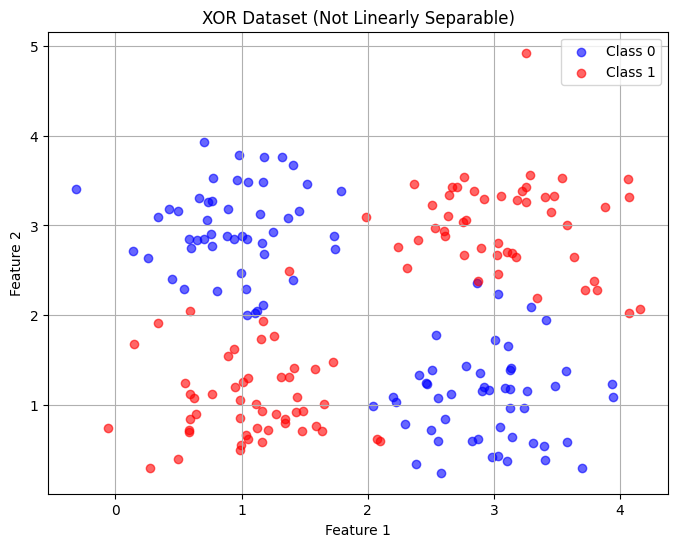

In [22]:
def generate_xor_dataset(n_samples=200):
    """Generate XOR dataset (not linearly separable)"""
    np.random.seed(42)
    
    # Create 4 clusters for XOR pattern
    # Class 0: top-left and bottom-right
    cluster1 = np.random.randn(n_samples // 4, 2) * 0.5 + np.array([1, 3])
    cluster2 = np.random.randn(n_samples // 4, 2) * 0.5 + np.array([3, 1])
    
    # Class 1: top-right and bottom-left
    cluster3 = np.random.randn(n_samples // 4, 2) * 0.5 + np.array([3, 3])
    cluster4 = np.random.randn(n_samples // 4, 2) * 0.5 + np.array([1, 1])
    
    # Combine
    X_class0 = np.vstack([cluster1, cluster2])
    X_class1 = np.vstack([cluster3, cluster4])
    
    X = np.vstack([X_class0, X_class1])
    y = np.hstack([np.zeros(n_samples // 2), np.ones(n_samples // 2)])
    
    return X, y

# Generate XOR dataset
X_xor, y_xor = generate_xor_dataset(200)

# Visualize XOR dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_xor[y_xor == 0][:, 0], X_xor[y_xor == 0][:, 1], 
            c='blue', label='Class 0', alpha=0.6)
plt.scatter(X_xor[y_xor == 1][:, 0], X_xor[y_xor == 1][:, 1], 
            c='red', label='Class 1', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('XOR Dataset (Not Linearly Separable)')
plt.legend()
plt.grid(True)
plt.show()

### Step 2: Train Perceptron on XOR Dataset

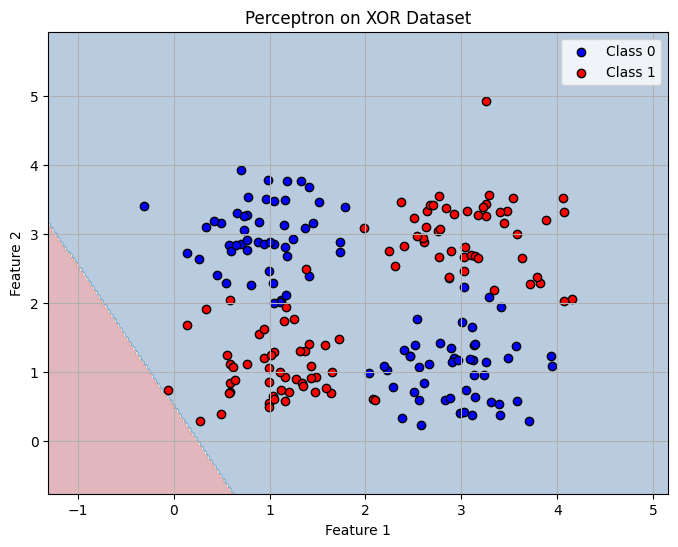

Perceptron Accuracy on XOR: 50.00%


In [23]:
# Train perceptron on XOR
perceptron_xor = Perceptron(input_size=2, learning_rate=0.1)
perceptron_xor.train(X_xor, y_xor, epochs=100)

# Plot decision boundary
plot_decision_boundary(perceptron_xor, X_xor, y_xor, 
                      'Perceptron on XOR Dataset')

# Calculate accuracy
predictions_xor = perceptron_xor.predict(X_xor)
accuracy_perceptron_xor = np.mean(predictions_xor == y_xor) * 100
print(f"Perceptron Accuracy on XOR: {accuracy_perceptron_xor:.2f}%")

### Step 3: Train Sigmoid Neuron on XOR Dataset

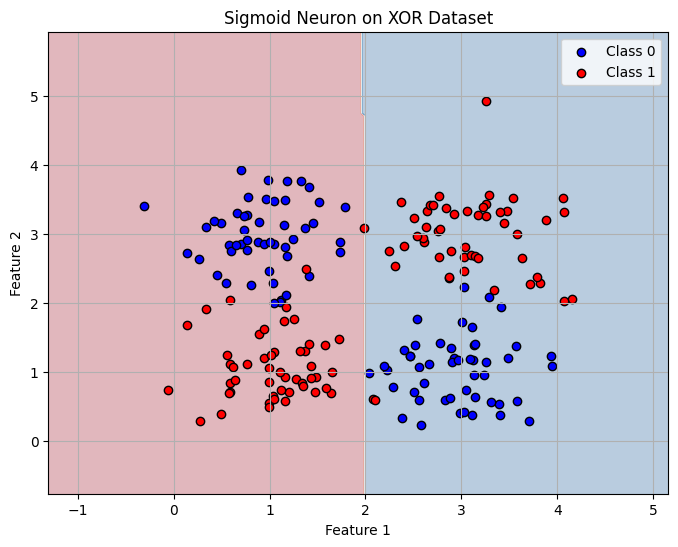

Sigmoid Neuron Accuracy on XOR: 50.50%


In [24]:
# Train sigmoid neuron on XOR
sigmoid_neuron_xor = SigmoidNeuron(input_size=2, learning_rate=0.1)
sigmoid_neuron_xor.train(X_xor, y_xor, epochs=1000)

# Create binary version for plotting
sigmoid_neuron_xor_binary = SigmoidNeuronWithBinary(input_size=2)
sigmoid_neuron_xor_binary.weights = sigmoid_neuron_xor.weights
sigmoid_neuron_xor_binary.bias = sigmoid_neuron_xor.bias

# Plot decision boundary
plot_decision_boundary(sigmoid_neuron_xor_binary, X_xor, y_xor, 
                      'Sigmoid Neuron on XOR Dataset')

# Calculate accuracy
predictions_sigmoid_xor = sigmoid_neuron_xor_binary.predict(X_xor)
accuracy_sigmoid_xor = np.mean(predictions_sigmoid_xor == y_xor) * 100
print(f"Sigmoid Neuron Accuracy on XOR: {accuracy_sigmoid_xor:.2f}%")

### Step 4: Performance Comparison Table

In [25]:
import pandas as pd

# Create comparison table
results = {
    'Model': ['Perceptron (Step)', 'Sigmoid Neuron'],
    'Linear Dataset Accuracy (%)': [f"{accuracy:.2f}", f"{accuracy_sigmoid:.2f}"],
    'XOR Dataset Accuracy (%)': [f"{accuracy_perceptron_xor:.2f}", f"{accuracy_sigmoid_xor:.2f}"]
}

df_results = pd.DataFrame(results)
print("\n" + "="*60)
print("PERFORMANCE COMPARISON TABLE")
print("="*60)
print(df_results.to_string(index=False))
print("="*60)


PERFORMANCE COMPARISON TABLE
            Model Linear Dataset Accuracy (%) XOR Dataset Accuracy (%)
Perceptron (Step)                      100.00                    50.00
   Sigmoid Neuron                      100.00                    50.50


### Step 5: Explanation - Why XOR Fails

**Why Single Neurons Fail on XOR Dataset:**

1. **Linear Decision Boundary Limitation**: Both Perceptron and Sigmoid neurons can only create a **single straight line** to separate classes. The mathematical form is: `w₁x₁ + w₂x₂ + b = 0`

2. **XOR is Not Linearly Separable**: The XOR pattern has classes arranged in opposite corners:
   - Class 0: top-left and bottom-right
   - Class 1: top-right and bottom-left
   
   No single straight line can separate these two groups.

3. **Why Both Models Perform Poorly**:
   - **Perceptron**: Even with many training iterations, it cannot converge because no linear solution exists
   - **Sigmoid Neuron**: Despite using gradient descent, it still only learns a linear boundary (just with smooth probabilities)

4. **Solution**: To solve XOR, we need a **Multi-Layer Perceptron (MLP)** with hidden layers. Multiple neurons can create non-linear decision boundaries by combining multiple linear boundaries.

5. **Key Insight**: The accuracy on XOR is around 50% (random guessing), confirming that single neurons cannot solve non-linearly separable problems.

---
## Summary of Deliverables

### Part A - Perceptron (Step Activation)
✓ Weight and bias values after training  
✓ Decision boundary plot  
✓ Accuracy on linear dataset

### Part B - Sigmoid Neuron
✓ Loss curve plot (Binary Cross Entropy)  
✓ Decision boundary plot  
✓ Accuracy comparison (Step vs Sigmoid)

### Part C - Linear vs XOR Comparison
✓ Performance comparison table  
✓ Decision boundaries for both datasets  
✓ Explanation of why XOR fails

**Key Takeaway**: Single neurons (both step and sigmoid) can only learn linear decision boundaries, making them unable to solve non-linearly separable problems like XOR. This motivates the need for multi-layer networks.